In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
feature_df = pd.read_csv('Features_data_set.csv')
sales_df1 = pd.read_csv('sales_data_set.csv')
stores_df = pd.read_csv('stores_data_set.csv')

In [3]:
feature_store_df= pd.merge(stores_df, feature_df, on = 'Store', how = 'inner' )
feature_store_df

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
feature_store_df.isna().sum()

Store              0
Type               0
Size               0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [5]:
feature_store_df['Date'] = pd.to_datetime(feature_store_df['Date'], format = '%d/%m/%Y')
feature_store_df['Week_Number'] = feature_store_df['Date'].dt.isocalendar().week


In [6]:
feature_store_df

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,6
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,7
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,8
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,26
8186,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,27
8187,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,28
8188,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,29


In [7]:
markdown_null = feature_store_df[feature_store_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].isnull().all(axis=1)]
markdown_null

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,6
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,7
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,8
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,45,B,118221,2011-10-07,55.82,3.583,NaN,NaN,NaN,NaN,NaN,187.483796,8.523,False,40
8096,45,B,118221,2011-10-14,63.82,3.541,NaN,NaN,NaN,NaN,NaN,187.691748,8.523,False,41
8097,45,B,118221,2011-10-21,59.60,3.570,NaN,NaN,NaN,NaN,NaN,187.784620,8.523,False,42
8098,45,B,118221,2011-10-28,51.78,3.569,NaN,NaN,NaN,NaN,NaN,187.877491,8.523,False,43


In [8]:
print(markdown_null.shape)
print(markdown_null.Date.min())
print(markdown_null.Date.max())

(4140, 15)
2010-02-05 00:00:00
2011-11-04 00:00:00


In [9]:
feature_store_df['Date'] = pd.to_datetime(feature_store_df['Date'])  
mask_null = feature_store_df['Date'] <= '2011-11-04'
markdown_null = feature_store_df.loc[mask_null].reset_index(drop=True)
markdown_notnull = feature_store_df.loc[~mask_null].reset_index(drop=True)


In [10]:
markdown_null

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,6
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,7
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,8
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,45,B,118221,2011-10-07,55.82,3.583,NaN,NaN,NaN,NaN,NaN,187.483796,8.523,False,40
4136,45,B,118221,2011-10-14,63.82,3.541,NaN,NaN,NaN,NaN,NaN,187.691748,8.523,False,41
4137,45,B,118221,2011-10-21,59.60,3.570,NaN,NaN,NaN,NaN,NaN,187.784620,8.523,False,42
4138,45,B,118221,2011-10-28,51.78,3.569,NaN,NaN,NaN,NaN,NaN,187.877491,8.523,False,43


In [11]:
markdown_notnull

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,45
1,1,A,151315,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False,46
2,1,A,151315,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True,47
3,1,A,151315,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False,48
4,1,A,151315,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,26
4046,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,27
4047,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,28
4048,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,29


In [12]:
print(markdown_notnull.shape)
print(markdown_notnull.Date.min())
print(markdown_notnull.Date.max())

(4050, 15)
2011-11-11 00:00:00
2013-07-26 00:00:00


In [13]:
markdown_notnull.isna().sum()

Store              0
Type               0
Size               0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1         18
MarkDown2       1129
MarkDown3        437
MarkDown4        586
MarkDown5          0
CPI              585
Unemployment     585
IsHoliday          0
Week_Number        0
dtype: int64

In [14]:
columns_to_fill = [f'MarkDown{i}' for i in range(1, 6)]
markdown_notnull[columns_to_fill] = markdown_notnull[columns_to_fill].fillna(0)
markdown_notnull.isna().sum()

Store             0
Type              0
Size              0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
Week_Number       0
dtype: int64

In [15]:
markdown_notnull

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,45
1,1,A,151315,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False,46
2,1,A,151315,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True,47
3,1,A,151315,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False,48
4,1,A,151315,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,26
4046,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,27
4047,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,28
4048,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,29


In [16]:
CPI_null = feature_store_df[feature_store_df[["CPI"]].isnull().all(axis=1)]

In [17]:
CPI_null

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
169,1,A,151315,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False,18
170,1,A,151315,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False,19
171,1,A,151315,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False,20
172,1,A,151315,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False,21
173,1,A,151315,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,26
8186,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,27
8187,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,28
8188,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,29


In [18]:
print(CPI_null.shape)
print(CPI_null.Date.min())
print(CPI_null.Date.max())

(585, 15)
2013-05-03 00:00:00
2013-07-26 00:00:00


In [19]:
CPI_null = markdown_notnull.loc[markdown_notnull['Date'] >= '2013-05-03'].reset_index(drop=True)
CPI_notnull = markdown_notnull.loc[markdown_notnull['Date'] < '2013-05-03'].reset_index(drop=True)


In [20]:
CPI_null

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False,18
1,1,A,151315,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False,19
2,1,A,151315,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False,20
3,1,A,151315,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False,21
4,1,A,151315,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,26
581,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,27
582,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,28
583,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,29


In [21]:
CPI_notnull

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,45
1,1,A,151315,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False,46
2,1,A,151315,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True,47
3,1,A,151315,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False,48
4,1,A,151315,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,45,B,118221,2013-03-29,40.68,3.784,5444.00,0.00,350.84,53.90,1722.11,193.442790,8.625,False,13
3461,45,B,118221,2013-04-05,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False,14
3462,45,B,118221,2013-04-12,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False,15
3463,45,B,118221,2013-04-19,56.27,3.676,1399.81,39.89,44.38,60.83,1445.05,193.589304,8.335,False,16


In [22]:
CPI_notnull_df = (CPI_notnull
                        .assign(Day=CPI_notnull['Date'].dt.day,
                                Month=CPI_notnull['Date'].dt.month,
                                Year=CPI_notnull['Date'].dt.year)
                        .drop('Date', axis=1)
                      )


In [23]:
CPI_notnull_df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,A,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,45,11,11,2011
1,1,A,151315,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False,46,18,11,2011
2,1,A,151315,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True,47,25,11,2011
3,1,A,151315,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False,48,2,12,2011
4,1,A,151315,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False,49,9,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,45,B,118221,40.68,3.784,5444.00,0.00,350.84,53.90,1722.11,193.442790,8.625,False,13,29,3,2013
3461,45,B,118221,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False,14,5,4,2013
3462,45,B,118221,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False,15,12,4,2013
3463,45,B,118221,56.27,3.676,1399.81,39.89,44.38,60.83,1445.05,193.589304,8.335,False,16,19,4,2013


In [24]:
CPI_null_df = (CPI_null
                        .assign(Day=CPI_null['Date'].dt.day,
                                Month=CPI_null['Date'].dt.month,
                                Year=CPI_null['Date'].dt.year)
                        .drop('Date', axis=1)
                      )


In [25]:
CPI_null_df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,A,151315,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False,18,3,5,2013
1,1,A,151315,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False,19,10,5,2013
2,1,A,151315,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False,20,17,5,2013
3,1,A,151315,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False,21,24,5,2013
4,1,A,151315,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False,22,31,5,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,45,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,26,28,6,2013
581,45,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,27,5,7,2013
582,45,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,28,12,7,2013
583,45,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,29,19,7,2013


In [26]:
CPI_null_df.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [27]:
Holiday = {True:1,
           False:2}
Type = {"A":1,"B":2,"C":3}

CPI_notnull_df.replace({'IsHoliday': Holiday, 'Type': Type}, inplace=True)
CPI_notnull_df.replace({'IsHoliday': Holiday, 'Type': Type}, inplace=True)

CPI_null_df.replace({'IsHoliday': Holiday, 'Type': Type}, inplace=True)
CPI_null_df.replace({'IsHoliday': Holiday, 'Type': Type}, inplace=True)



In [28]:
CPI_notnull_df.head()

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,1,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,2,45,11,11,2011
1,1,1,151315,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,2,46,18,11,2011
2,1,1,151315,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,1,47,25,11,2011
3,1,1,151315,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,2,48,2,12,2011
4,1,1,151315,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,2,49,9,12,2011


In [29]:
CPI_notnull_df.isna().sum()

Store           0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Week_Number     0
Day             0
Month           0
Year            0
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = CPI_notnull_df.drop(["Unemployment", "CPI"], axis=1)
Y = CPI_notnull_df['Unemployment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)


Y_train_pred = rf_regressor.predict(X_train)
Y_test_pred = rf_regressor.predict(X_test)


train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)


print("Train Mean Squared Error:", round(train_mse, 4))
print("Test Mean Squared Error:", round(test_mse, 4))
print("Train R-squared Score:", round(train_r2, 4))
print("Test R-squared Score:", round(test_r2, 4))


Train Mean Squared Error: 0.0036
Test Mean Squared Error: 0.0216
Train R-squared Score: 0.9988
Test R-squared Score: 0.9925


In [31]:
CPI_null

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False,18
1,1,A,151315,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False,19
2,1,A,151315,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False,20
3,1,A,151315,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False,21
4,1,A,151315,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,26
581,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,27
582,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,28
583,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,29


In [32]:
x_new =  CPI_null_df.drop(['Unemployment', 'CPI'], axis =1)
predicted_unemp = rf_regressor.predict(x_new)

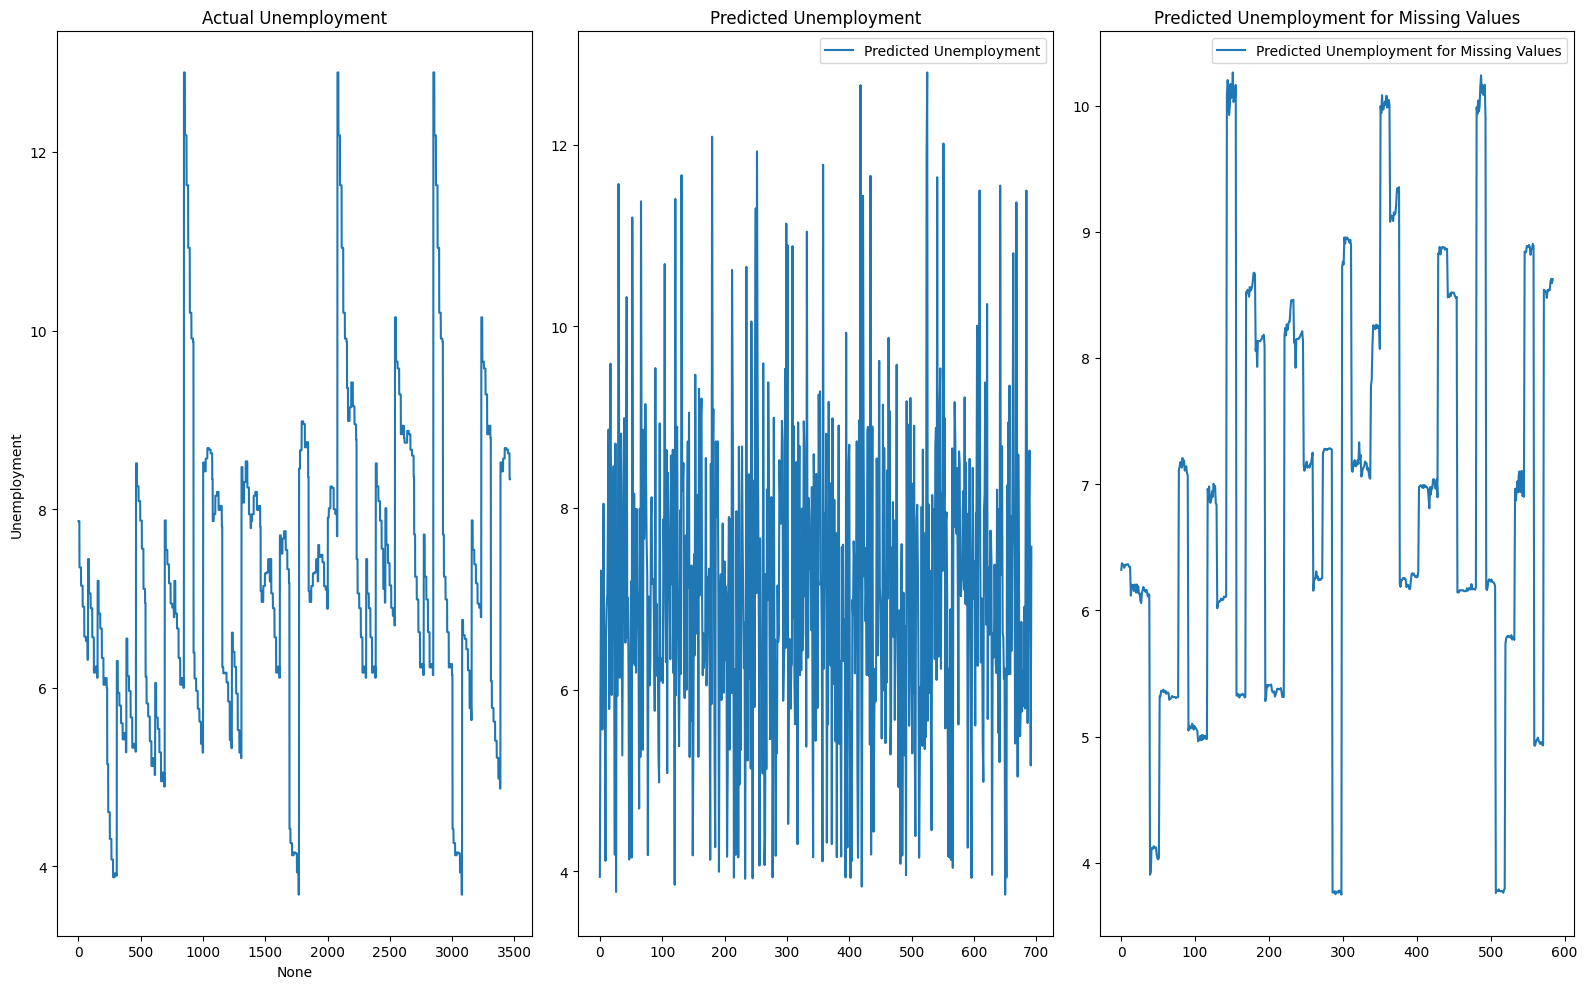

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

plt.subplot(1, 3, 1)
sns.lineplot(data=CPI_notnull_df, x=CPI_notnull_df.index, y='Unemployment')
plt.title('Actual Unemployment')


plt.subplot(1, 3, 2)
sns.lineplot(x=range(len(Y_test_pred)), y=Y_test_pred, label='Predicted Unemployment')
plt.title('Predicted Unemployment')

plt.subplot(1, 3, 3)
sns.lineplot(x=range(len(predicted_unemp)), y=predicted_unemp, label='Predicted Unemployment for Missing Values')
plt.title('Predicted Unemployment for Missing Values')

plt.tight_layout()
plt.show()


In [34]:
CPI_null_df['Unemployment'] = predicted_unemp
CPI_null_df


,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,1,151315,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,6.32148,2,18,3,5,2013
1,1,1,151315,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,6.37479,2,19,10,5,2013
2,1,1,151315,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,6.36096,2,20,17,5,2013
3,1,1,151315,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,6.36223,2,21,24,5,2013
4,1,1,151315,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,6.33735,2,22,31,5,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,45,2,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,8.53823,2,26,28,6,2013
581,45,2,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,8.60687,2,27,5,7,2013
582,45,2,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,8.62729,2,28,12,7,2013
583,45,2,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,8.59277,2,29,19,7,2013


In [35]:
Y = CPI_notnull_df['CPI']
X = CPI_notnull_df.drop('CPI', axis =1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)


Y_train_pred = rf_regressor.predict(X_train)
Y_test_pred = rf_regressor.predict(X_test)


train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)


print("Train Mean Squared Error:", round(train_mse, 4))
print("Test Mean Squared Error:", round(test_mse, 4))
print("Train R-squared Score:", round(train_r2, 4))
print("Test R-squared Score:", round(test_r2, 4))


Train Mean Squared Error: 1.9368
Test Mean Squared Error: 9.0861
Train R-squared Score: 0.9988
Test R-squared Score: 0.9946


In [36]:
x_new=CPI_null_df.drop( 'CPI', axis =1)
predicted_CPI = rf_regressor.predict(x_new)

In [37]:
CPI_null_df['CPI'] = predicted_CPI
CPI_null_df


,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,1,151315,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,225.072464,6.32148,2,18,3,5,2013
1,1,1,151315,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,224.910528,6.37479,2,19,10,5,2013
2,1,1,151315,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,224.717329,6.36096,2,20,17,5,2013
3,1,1,151315,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,224.837542,6.36223,2,21,24,5,2013
4,1,1,151315,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,225.016935,6.33735,2,22,31,5,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,45,2,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,192.806220,8.53823,2,26,28,6,2013
581,45,2,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,192.727812,8.60687,2,27,5,7,2013
582,45,2,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.271931,8.62729,2,28,12,7,2013
583,45,2,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,192.903186,8.59277,2,29,19,7,2013


In [38]:
markdown_notnull_df = pd.concat([CPI_notnull_df, CPI_null_df], ignore_index=True)
markdown_notnull_df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,1,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.86600,2,45,11,11,2011
1,1,1,151315,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.86600,2,46,18,11,2011
2,1,1,151315,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.86600,1,47,25,11,2011
3,1,1,151315,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.86600,2,48,2,12,2011
4,1,1,151315,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.86600,2,49,9,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,45,2,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,192.806220,8.53823,2,26,28,6,2013
4046,45,2,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,192.727812,8.60687,2,27,5,7,2013
4047,45,2,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.271931,8.62729,2,28,12,7,2013
4048,45,2,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,192.903186,8.59277,2,29,19,7,2013


In [39]:
markdown_null


,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,6
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,7
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,8
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,45,B,118221,2011-10-07,55.82,3.583,NaN,NaN,NaN,NaN,NaN,187.483796,8.523,False,40
4136,45,B,118221,2011-10-14,63.82,3.541,NaN,NaN,NaN,NaN,NaN,187.691748,8.523,False,41
4137,45,B,118221,2011-10-21,59.60,3.570,NaN,NaN,NaN,NaN,NaN,187.784620,8.523,False,42
4138,45,B,118221,2011-10-28,51.78,3.569,NaN,NaN,NaN,NaN,NaN,187.877491,8.523,False,43


In [40]:
markdown_null_df = (markdown_null
                        .assign(Day=markdown_null['Date'].dt.day,
                                Month=markdown_null['Date'].dt.month,
                                Year=markdown_null['Date'].dt.year)
                        .drop('Date', axis=1)
                      )
markdown_null_df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,5,2,2010
1,1,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,6,12,2,2010
2,1,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,7,19,2,2010
3,1,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,8,26,2,2010
4,1,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,9,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,45,B,118221,55.82,3.583,NaN,NaN,NaN,NaN,NaN,187.483796,8.523,False,40,7,10,2011
4136,45,B,118221,63.82,3.541,NaN,NaN,NaN,NaN,NaN,187.691748,8.523,False,41,14,10,2011
4137,45,B,118221,59.60,3.570,NaN,NaN,NaN,NaN,NaN,187.784620,8.523,False,42,21,10,2011
4138,45,B,118221,51.78,3.569,NaN,NaN,NaN,NaN,NaN,187.877491,8.523,False,43,28,10,2011


In [41]:
Holiday = {True:1,
           False:2}
Type = {"A":1,"B":2,"C":3}

markdown_null_df.replace({'IsHoliday': Holiday, 'Type': Type}, inplace=True)
markdown_null_df.replace({'IsHoliday': Holiday, 'Type': Type}, inplace=True)

markdown_null_df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,5,5,2,2010
1,1,1,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,6,12,2,2010
2,1,1,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2,7,19,2,2010
3,1,1,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2,8,26,2,2010
4,1,1,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2,9,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,45,2,118221,55.82,3.583,NaN,NaN,NaN,NaN,NaN,187.483796,8.523,2,40,7,10,2011
4136,45,2,118221,63.82,3.541,NaN,NaN,NaN,NaN,NaN,187.691748,8.523,2,41,14,10,2011
4137,45,2,118221,59.60,3.570,NaN,NaN,NaN,NaN,NaN,187.784620,8.523,2,42,21,10,2011
4138,45,2,118221,51.78,3.569,NaN,NaN,NaN,NaN,NaN,187.877491,8.523,2,43,28,10,2011


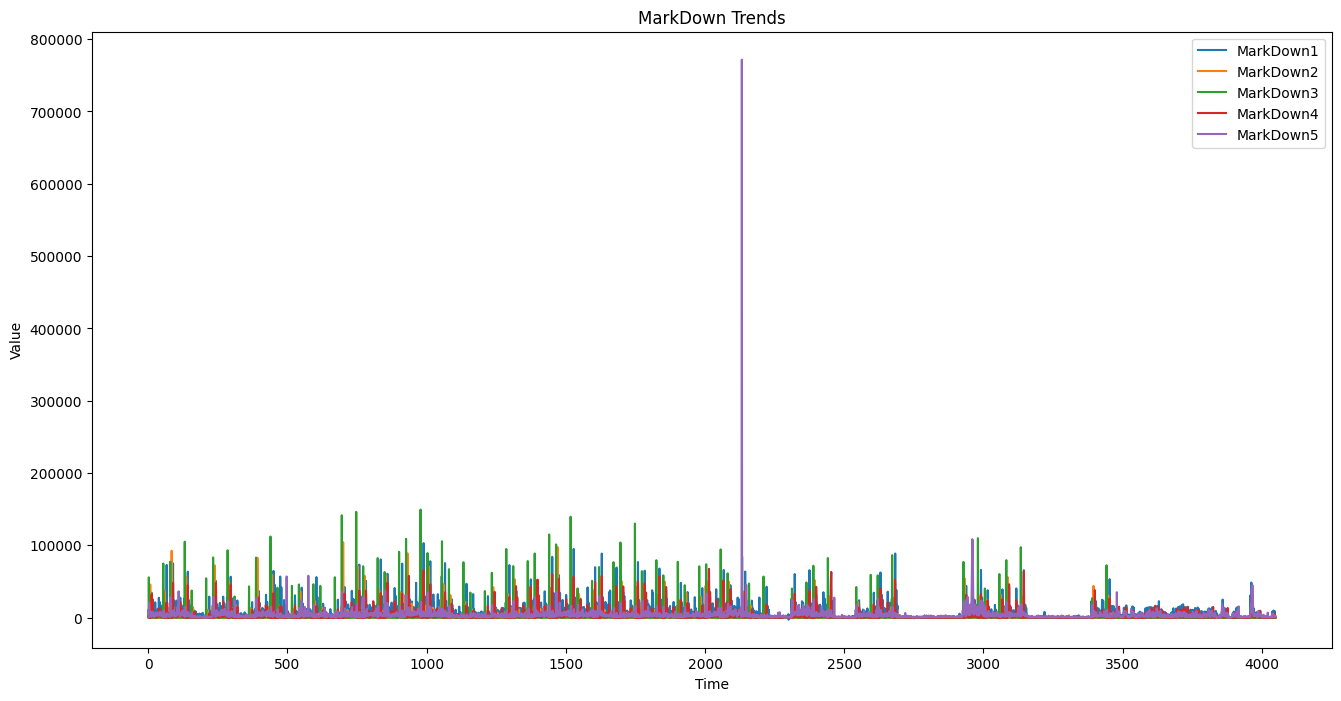

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# List of 'MarkDown' columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Plot each 'MarkDown' column with a different color
for column in markdown_columns:
    plt.plot(markdown_notnull_df.index, markdown_notnull_df[column], label=column)

plt.title('MarkDown Trends')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [43]:
Y= markdown_notnull_df['MarkDown1']
X = markdown_notnull_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],  axis =1)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


mod1_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
mod1_regressor.fit(X_train, Y_train)


Y_train_pred = mod1_regressor.predict(X_train)
Y_test_pred = mod1_regressor.predict(X_test)


train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)


print("Train Mean Squared Error:", round(train_mse, 4))
print("Test Mean Squared Error:", round(test_mse, 4))
print("Train R-squared Score:", round(train_r2, 4))
print("Test R-squared Score:", round(test_r2, 4))


Train Mean Squared Error: 3555610.5847
Test Mean Squared Error: 21453062.2241
Train R-squared Score: 0.9601
Test R-squared Score: 0.7004


In [45]:
x_new = markdown_null_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],  axis =1)
predicted_markdown1 = mod1_regressor.predict(x_new)
markdown_null_df['MarkDown1'] = predicted_markdown1

In [46]:
Y= markdown_notnull_df['MarkDown2']
X = markdown_notnull_df.drop(['MarkDown2','MarkDown3','MarkDown4','MarkDown5'],  axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


mod2_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
mod2_regressor.fit(X_train, Y_train)


Y_train_pred = mod2_regressor.predict(X_train)
Y_test_pred = mod2_regressor.predict(X_test)


train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)


print("Train Mean Squared Error:", round(train_mse, 4))
print("Test Mean Squared Error:", round(test_mse, 4))
print("Train R-squared Score:", round(train_r2, 4))
print("Test R-squared Score:", round(test_r2, 4))


Train Mean Squared Error: 1256008.8067
Test Mean Squared Error: 4632820.8377
Train R-squared Score: 0.9781
Test R-squared Score: 0.9237


In [51]:
x_new = markdown_null_df.drop(['MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],  axis =1)
predicted_markdown2 = mod2_regressor.predict(x_new)
markdown_null_df['MarkDown2'] = predicted_markdown2

In [48]:
Y= markdown_notnull_df['MarkDown3']
X = markdown_notnull_df.drop(['MarkDown3','MarkDown4','MarkDown5'],  axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


mod3_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
mod3_regressor.fit(X_train, Y_train)


Y_train_pred = mod3_regressor.predict(X_train)
Y_test_pred = mod3_regressor.predict(X_test)


train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)


print("Train Mean Squared Error:", round(train_mse, 4))
print("Test Mean Squared Error:", round(test_mse, 4))
print("Train R-squared Score:", round(train_r2, 4))
print("Test R-squared Score:", round(test_r2, 4))


Train Mean Squared Error: 2484829.9794
Test Mean Squared Error: 14166856.938
Train R-squared Score: 0.9758
Test R-squared Score: 0.9104


In [50]:
x_new = markdown_null_df.drop(['MarkDown3', 'MarkDown4', 'MarkDown5'],  axis =1)
predicted_markdown3 = mod3_regressor.predict(x_new)
markdown_null_df['MarkDown3'] = predicted_markdown3

In [52]:
Y= markdown_notnull_df['MarkDown4']
X = markdown_notnull_df.drop(['MarkDown4','MarkDown5'],  axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


mod4_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
mod4_regressor.fit(X_train, Y_train)


Y_train_pred = mod4_regressor.predict(X_train)
Y_test_pred = mod4_regressor.predict(X_test)


train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)


print("Train Mean Squared Error:", round(train_mse, 4))
print("Test Mean Squared Error:", round(test_mse, 4))
print("Train R-squared Score:", round(train_r2, 4))
print("Test R-squared Score:", round(test_r2, 4))


Train Mean Squared Error: 1055807.6888
Test Mean Squared Error: 4320677.4259
Train R-squared Score: 0.9759
Test R-squared Score: 0.851


In [54]:
x_new = markdown_null_df.drop(['MarkDown4', 'MarkDown5'],  axis =1)
predicted_markdown4 = mod4_regressor.predict(x_new)
markdown_null_df['MarkDown4'] = predicted_markdown4

In [57]:
Y= markdown_notnull_df['MarkDown5']
X = markdown_notnull_df.drop('MarkDown5',  axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


mod5_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
mod5_regressor.fit(X_train, Y_train)


Y_train_pred = mod5_regressor.predict(X_train)
Y_test_pred = mod5_regressor.predict(X_test)


train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)


print("Train Mean Squared Error:", round(train_mse, 4))
print("Test Mean Squared Error:", round(test_mse, 4))
print("Train R-squared Score:", round(train_r2, 4))
print("Test R-squared Score:", round(test_r2, 4))


Train Mean Squared Error: 30872492.4431
Test Mean Squared Error: 10120384.3818
Train R-squared Score: 0.8527
Test R-squared Score: 0.4226


In [58]:
x_new = markdown_null_df.drop('MarkDown5',  axis =1)
predicted_markdown5 = mod5_regressor.predict(x_new)
markdown_null_df['MarkDown5'] = predicted_markdown5

In [59]:
feature_notnull_df = pd.concat([markdown_null_df, markdown_notnull_df], axis = 0, ignore_index=True)
feature_notnull_df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,1,151315,42.31,2.572,38388.4128,4852.4670,213.8109,36863.2271,6010.6891,211.096358,8.10600,2,5,5,2,2010
1,1,1,151315,38.51,2.548,23245.4527,6181.3103,1199.5563,18710.0328,6194.4987,211.242170,8.10600,1,6,12,2,2010
2,1,1,151315,39.93,2.514,15784.6924,10742.5800,183.3400,12238.8011,5260.9583,211.289143,8.10600,2,7,19,2,2010
3,1,1,151315,46.63,2.561,10016.4776,8007.6422,188.5122,1637.5550,5725.4316,211.319643,8.10600,2,8,26,2,2010
4,1,1,151315,46.50,2.625,27505.1892,4664.2566,211.5127,21546.6475,5281.2358,211.350143,8.10600,2,9,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2,118221,76.05,3.639,4842.2900,975.0300,3.0000,2449.9700,3169.6900,192.806220,8.53823,2,26,28,6,2013
8186,45,2,118221,77.50,3.614,9090.4800,2268.5800,582.7400,5797.4700,1514.9300,192.727812,8.60687,2,27,5,7,2013
8187,45,2,118221,79.37,3.614,3789.9400,1827.3100,85.7200,744.8400,2150.3600,193.271931,8.62729,2,28,12,7,2013
8188,45,2,118221,82.84,3.737,2961.4900,1047.0700,204.1900,363.0000,1059.4600,192.903186,8.59277,2,29,19,7,2013


In [60]:
sales_df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [62]:
sales_df1.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [63]:
sales_df1['Date'] = pd.to_datetime(sales_df1['Date'], format = '%d/%m/%Y')
sales_df1.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [64]:
feature_notnull_df1 = feature_notnull_df.copy()
feature_notnull_df1['Date'] = pd.to_datetime(feature_notnull_df1[['Year', 'Month', 'Day']])
feature_notnull_df1

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year,Date
0,1,1,151315,42.31,2.572,38388.4128,4852.4670,213.8109,36863.2271,6010.6891,211.096358,8.10600,2,5,5,2,2010,2010-02-05
1,1,1,151315,38.51,2.548,23245.4527,6181.3103,1199.5563,18710.0328,6194.4987,211.242170,8.10600,1,6,12,2,2010,2010-02-12
2,1,1,151315,39.93,2.514,15784.6924,10742.5800,183.3400,12238.8011,5260.9583,211.289143,8.10600,2,7,19,2,2010,2010-02-19
3,1,1,151315,46.63,2.561,10016.4776,8007.6422,188.5122,1637.5550,5725.4316,211.319643,8.10600,2,8,26,2,2010,2010-02-26
4,1,1,151315,46.50,2.625,27505.1892,4664.2566,211.5127,21546.6475,5281.2358,211.350143,8.10600,2,9,5,3,2010,2010-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2,118221,76.05,3.639,4842.2900,975.0300,3.0000,2449.9700,3169.6900,192.806220,8.53823,2,26,28,6,2013,2013-06-28
8186,45,2,118221,77.50,3.614,9090.4800,2268.5800,582.7400,5797.4700,1514.9300,192.727812,8.60687,2,27,5,7,2013,2013-07-05
8187,45,2,118221,79.37,3.614,3789.9400,1827.3100,85.7200,744.8400,2150.3600,193.271931,8.62729,2,28,12,7,2013,2013-07-12
8188,45,2,118221,82.84,3.737,2961.4900,1047.0700,204.1900,363.0000,1059.4600,192.903186,8.59277,2,29,19,7,2013,2013-07-19


In [66]:
df = feature_notnull_df1.merge(sales_df1, on = ['Store', 'Date'],how = 'inner')
df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,IsHoliday_x,Week_Number,Day,Month,Year,Date,Dept,Weekly_Sales,IsHoliday_y
0,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,...,8.106,2,5,5,2,2010,2010-02-05,1,24924.50,False
1,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,...,8.106,2,5,5,2,2010,2010-02-05,2,50605.27,False
2,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,...,8.106,2,5,5,2,2010,2010-02-05,3,13740.12,False
3,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,...,8.106,2,5,5,2,2010,2010-02-05,4,39954.04,False
4,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,...,8.106,2,5,5,2,2010,2010-02-05,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,...,8.667,2,43,26,10,2012,2012-10-26,93,2487.80,False
421566,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,...,8.667,2,43,26,10,2012,2012-10-26,94,5203.31,False
421567,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,...,8.667,2,43,26,10,2012,2012-10-26,95,56017.47,False
421568,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,...,8.667,2,43,26,10,2012,2012-10-26,97,6817.48,False


In [67]:
df.rename(columns = {'IsHoliday_x':'IsHoliday'}, inplace = True)
df.drop(columns=['IsHoliday_y', 'Date'],axis =1, inplace = True)
df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year,Dept,Weekly_Sales
0,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,1,24924.50
1,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,2,50605.27
2,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,3,13740.12
3,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,4,39954.04
4,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,93,2487.80
421566,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,94,5203.31
421567,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,95,56017.47
421568,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,97,6817.48


In [70]:
df.isna().sum()

Store           0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Week_Number     0
Day             0
Month           0
Year            0
Dept            0
Weekly_Sales    0
dtype: int64

In [ ]:
#df.to_csv(r'C:/Users/gokul/Music/retail_clean_ds/Clean_dataset.csv', index = False)

**EDA**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Clean_dataset.csv')
df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year,Dept,Weekly_Sales
0,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,1,24924.50
1,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,2,50605.27
2,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,3,13740.12
3,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,4,39954.04
4,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,93,2487.80
421566,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,94,5203.31
421567,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,95,56017.47
421568,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,97,6817.48


In [3]:
df.isna().sum()

Store           0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Week_Number     0
Day             0
Month           0
Year            0
Dept            0
Weekly_Sales    0
dtype: int64

In [4]:
df.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 39, 77, 50, 43, 65], dtype=int64)

In [5]:
df.Type.value_counts()

Type
1    215478
2    163495
3     42597
Name: count, dtype: int64

In [6]:
plt.figure(figsize=(8,6))
sns.barplot(df,x='Weekly_Sales',y='Store')
plt.title("weekly sales by store")
plt.xlabel('weekly sales')
plt.ylabel('store')
plt.show()

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Dept', y='Weekly_Sales')
plt.title('Weekly Sales Distribution By Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:
top10_dept = pd.pivot_table(df, values = "Weekly_Sales", index = "Dept").sort_values(by = 'Weekly_Sales', ascending = False)
top10_dept =top10_dept.head(10)

plt.figure(figsize=(16, 6))
sns.barplot(data=top10_dept, y=top10_dept.index, x='Weekly_Sales', orient='h')
plt.title('Top 10 Average Weekly Sales By Department')
plt.xlabel('Average Weekly Sales')
plt.ylabel('Department')
plt.show()


In [ ]:
top10_dept = pd.pivot_table(df.query('IsHoliday == "Thanksgiving"'), values = "Weekly_Sales", index = "Dept").sort_values(by = 'Weekly_Sales', ascending = False)
top10_dept =top10_dept.head(10)

plt.figure(figsize=(16, 6))
sns.barplot(data=top10_dept, x=top10_dept.index, y='Weekly_Sales', palette='viridis')
plt.title('Top 10 Average Weekly Sales by Department in Thanksgiving Festival')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.show()


In [ ]:
top10_dept = pd.pivot_table(df.query('IsHoliday == "No Holiday"'), values = "Weekly_Sales", index = "Dept").sort_values(by = 'Weekly_Sales', ascending = False)
top10_dept =top10_dept.head(10)

plt.figure(figsize=(16, 6))
sns.barplot(data=top10_dept, x=top10_dept.index, y='Weekly_Sales', hue='IsHoliday', palette='Set1')
plt.title('Top 10 Average Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Is Holiday', loc='upper right')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Store', y='Weekly_Sales', palette='pastel')
plt.title('Distribution of Weekly Sales By Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:
top10_store = pd.pivot_table(df, values = "Weekly_Sales", index = "Store").sort_values(by = 'Weekly_Sales', ascending = False)
top10_store = top10_store.head(10)

plt.figure(figsize=(16, 6))
sns.stripplot(data=top10_store, x=top10_store.index, y='Weekly_Sales', color='orange', jitter=True)
plt.title('Top 10 Average Weekly Sales By Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()


In [ ]:
top10_store = pd.pivot_table(df.query('IsHoliday == "Christmas"'), values = "Weekly_Sales", index = "Store").sort_values(by = 'Weekly_Sales', ascending = False)
top10_store =top10_store.head(10)

plt.figure(figsize=(16, 6))
sns.swarmplot(data=top10_store, x=top10_store.index, y='Weekly_Sales', color='purple')
plt.title('Top 10 Weekly Sales Swarm Plot By Store in Christmas')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='Month', y='Weekly_Sales', ci=None, color='orange')
plt.title('Average Weekly Sales By Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Year', y='Weekly_Sales', palette='pastel')
plt.title('Weekly Sales Distribution By Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='Week_Number', y='Weekly_Sales', ci=None, marker='o', color='green')
plt.title('Average Weekly Sales By Week')
plt.xlabel('Week')
plt.ylabel('Average Weekly Sales')
plt.show()


In [ ]:
top10_week = pd.pivot_table(df, values = "Weekly_Sales", index = "Week_Number").sort_values(by = 'Weekly_Sales', ascending = False)
top10_week =top10_week.head(10)

plt.figure(figsize=(16, 6))
sns.pointplot(data=top10_week, y=top10_week.index, x='Weekly_Sales', ci=None, color='orange')
plt.title('Top 10 Average Weekly Sales By Week')
plt.xlabel('Average Weekly Sales')
plt.ylabel('Week')
plt.show()


In [ ]:
df1 = df[(df['IsHoliday']!='No Holiday') |(df['Week_Number']==22)  ]
holidaymarkdown = pd.pivot_table(df1, values = 'Weekly_Sales', columns='Year', index = "Week_Number")
holidaymarkdown.plot(kind='bar', )
plt.figure(figsize=(16, 6))
sns.pointplot(data=holidaymarkdown, ci=None, color='purple', markers='o')
plt.title('Weekly Sales During Holidays')
plt.xlabel('Week Number')
plt.ylabel('Weekly Sales')
plt.legend(title='Year')
plt.show()


In [ ]:
def holiday_mapping(week_number):
    if week_number == 6:
        return 'Super Bowl'
    elif week_number == 36:
        return 'Labor Day'
    elif week_number == 47:
        return 'Thanksgiving'
    elif week_number == 51:
        return 'Christmas'
    else:
        return 'No Holiday'

df['IsHoliday'] = df['Week_Number'].apply(holiday_mapping)


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution by IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:
markdown1 = pd.pivot_table(df, values = "MarkDown1", columns = "Year", index = "Week_Number")
plt.figure(figsize=(12, 6))
sns.lineplot(data=markdown1, markers=True)
plt.title('MarkDown1 Trends Over Weeks and Years')
plt.xlabel('Week_Number')
plt.ylabel('MarkDown1')
plt.show()


In [ ]:
markdown2 = pd.pivot_table(df, values = "MarkDown2", columns = "Year", index = "Week_Number")
plt.figure(figsize=(12, 6))
sns.lineplot(data=markdown2, markers=True)
plt.title('MarkDown2 Trends Over Weeks and Years')
plt.xlabel('Week_Number')
plt.ylabel('MarkDown2')
plt.show()


In [ ]:
markdown3 = pd.pivot_table(df, values = "MarkDown3", columns = "Year", index = "Week_Number")
plt.figure(figsize=(12, 6))
sns.lineplot(data=markdown3, markers=True)
plt.title('MarkDown3 Trends Over Weeks and Years')
plt.xlabel('Week_Number')
plt.ylabel('MarkDown3')
plt.show()


In [ ]:
markdown4 = pd.pivot_table(df, values = "MarkDown4", columns = "Year", index = "Week_Number")
plt.figure(figsize=(12, 6))
sns.lineplot(data=markdown4, markers=True)
plt.title('MarkDown4 Trends Over Weeks and Years')
plt.xlabel('Week_Number')
plt.ylabel('MarkDown4')
plt.show()


In [ ]:
markdown5 = pd.pivot_table(df, values = "MarkDown5", columns = "Year", index = "Week_Number")
plt.figure(figsize=(12, 6))
sns.lineplot(data=markdown5, markers=True)
plt.title('MarkDown5 Trends Over Weeks and Years')
plt.xlabel('Week_Number')
plt.ylabel('MarkDown5')
plt.show()


In [ ]:
cpi = pd.pivot_table(df, values ="CPI", columns = "Year", index = "Week_Number")
plt.figure(figsize=(12, 6))
sns.lineplot(data=cpi, markers=True)
plt.title('CPI Trends Over Weeks and Years')
plt.xlabel('Week_Number')
plt.ylabel('CPI')
plt.show()

In [ ]:
unemp = pd.pivot_table(df, values ="Unemployment", columns = "Year", index = "Week_Number")
plt.figure(figsize=(12, 6))
sns.lineplot(data=unemp, markers=True)
plt.title('Unemployment Trends Over Weeks and Years')
plt.xlabel('Week_Number')
plt.ylabel('Unemployment')
plt.show()

In [ ]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")

plt.figure(figsize=(12, 6))
sns.lineplot(data=fuel_price, markers=True)
plt.title('Weekly_Sales Trends Over Weeks and Years')
plt.xlabel('Week_Number')
plt.ylabel('Weekly_Sales')
plt.show()

In [ ]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('Scatter Plot of Weekly Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:
Unemp = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title('Scatter Plot of Weekly Sales vs. Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()
